In [1]:
import windIO
from windIO.utils.yml_utils import validate_yaml, Loader, load_yaml
from flow_api.foxes_api import runFoxes
from flow_api.pywake_api import run_pywake
from flow_api.wayve_api import run_wayve
import os
import xarray as xr
from windIO.utils import plant_schemas_path
import matplotlib.pyplot as plt

/Users/julianquick/miniconda3/envs/sgd/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/julianquick/miniconda3/envs/sgd/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
yml_input = '../examples/cases/windio_4turbines_2flowcases//wind_energy_system/FLOW_toy_study_wind_energy_system.yaml'
os.makedirs('output', exist_ok=True)

In [3]:
validate_yaml(yml_input, plant_schemas_path + 'wind_energy_system.yaml')

Validation succeeded


In [4]:
runFoxes(yml_input)

Reading windio file ../examples/cases/windio_4turbines_2flowcases/wind_energy_system/FLOW_toy_study_wind_energy_system.yaml
  Name: FLOW UQ vnv study on toy problem, 4 WT Wind Farm
  Contents: ['site', 'wind_farm', 'attributes']
Reading site
  Name: FLOW UQ vnv study on toy problem, 4 WT Wind Farm
  Contents: ['boundaries', 'energy_resource']
Ignoring variable 'friction_velocity'
Reading wind farm
  Name: FLOW UQ vnv study on toy problem, 4 WT Wind Farm
  Contents: ['layouts', 'turbines']
Reading attributes
  Contents: ['flow_model', 'analysis', 'outputs']
Creating windio runner
Writing file results/recorded_input.yaml
Creating algorithm 'Downwind'
Running farm_calc
Running output: StateTurbineTable
Writing file results/turbine_data.nc
Running output: SliceData

Initializing algorithm 'Downwind'
Initializing model 'Downwind'
Initializing model 'Timeseries'
Initializing model 'centre'
Initializing model 'basic_ctrl_prer'
Initializing model 'DTU 10MW Offshore Reference Turbine'
Initializ

In [5]:
foxes_dat = xr.load_dataset('./results/turbine_data.nc')
foxes_dat 

<xarray.Dataset>
Dimensions:                   (time: 2, turbine: 4)
Coordinates:
  * time                      (time) float64 0.0 1.0
  * turbine                   (turbine) int64 0 1 2 3
Data variables:
    power                     (time, turbine) float64 7.056e+06 ... 4.271e+06
    rotor_effective_velocity  (time, turbine) float64 10.09 8.287 ... 8.514

In [6]:
run_pywake(yml_input)

(2,) ()
aep is  <xarray.DataArray 'AEP [GWh]' ()>
array(168.46233553) GWh
(0.48 capcacity factor)
<xarray.SimulationResult>
Dimensions:      (wt: 4, time: 2)
Coordinates:
  * time         (time) int64 0 1
  * wt           (wt) int64 0 1 2 3
    wd           (time) float64 271.8 266.2
    ws           (time) float64 10.09 10.23
    type         (wt) float64 0.0 0.0 0.0 0.0
Data variables: (12/14)
    WS_eff       (wt, time) float64 10.09 10.23 8.28 8.852 ... 8.617 7.752 8.511
    TI_eff       (wt, time) float64 2.619 1.537 2.622 ... 1.543 2.622 1.543
    Power        (wt, time) float64 7.056e+03 7.378e+03 ... 3.221e+03 4.266e+03
    CT           (wt, time) float64 0.814 0.814 0.814 ... 0.814 0.8249 0.814
    yaw          int64 0
    tilt         int64 0
    ...           ...
    y            (wt) int64 0 0 0 0
    WD           (time) float64 271.8 266.2
    TI           (time) float64 2.619 1.537
    wd_bin_size  float64 -5.623
    WS           (time) float64 10.09 10.23
    P          

<xarray.DataArray 'AEP [GWh]' ()>
array(168.46233553)

In [7]:
pywake_dat = xr.load_dataset('output/PowerTable.nc')
pywake_dat

<xarray.Dataset>
Dimensions:               (turbine: 4, time: 2)
Coordinates:
  * time                  (time) int64 0 1
  * turbine               (turbine) int64 0 1 2 3
    wd                    (time) float64 271.8 266.2
    ws                    (time) float64 10.09 10.23
    type                  (turbine) float64 0.0 0.0 0.0 0.0
Data variables:
    power                 (turbine, time) float64 7.056e+03 ... 4.266e+03
    effective_wind_speed  (turbine, time) float64 10.09 10.23 ... 7.752 8.511

In [8]:
run_wayve(yml_input)

In [9]:
wayve_dat =  xr.load_dataset('./turbine_data.nc')
wayve_dat

<xarray.Dataset>
Dimensions:                   (time: 2, turbine: 4)
Coordinates:
  * time                      (time) float64 0.0 1.0
  * turbine                   (turbine) int64 0 1 2 3
Data variables:
    power                     (time, turbine) float64 6.849e+06 ... 7.087e+06
    rotor_effective_velocity  (time, turbine) float64 10.0 9.993 ... 10.11 10.11

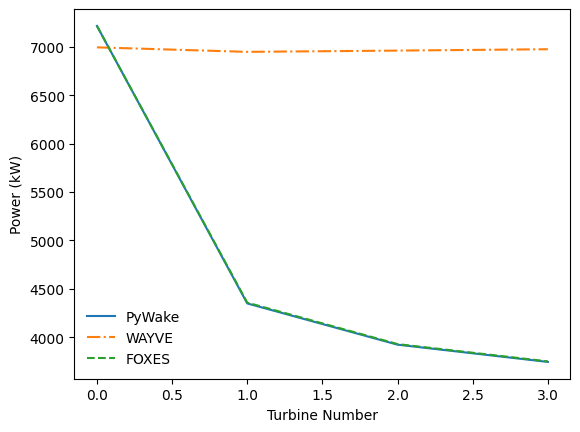

In [10]:
plt.plot(pywake_dat.turbine, pywake_dat.power.mean('time'), label='PyWake')
plt.plot(wayve_dat.turbine, wayve_dat.power.mean('time') / 1e3, ls='-.', label='WAYVE')
plt.plot(foxes_dat.turbine, foxes_dat.power.mean('time') / 1e3, ls='--', label='FOXES')
plt.xlabel('Turbine Number')
plt.ylabel('Power (kW)')
plt.legend()

Text(0, 0.5, 'Power (kW)')

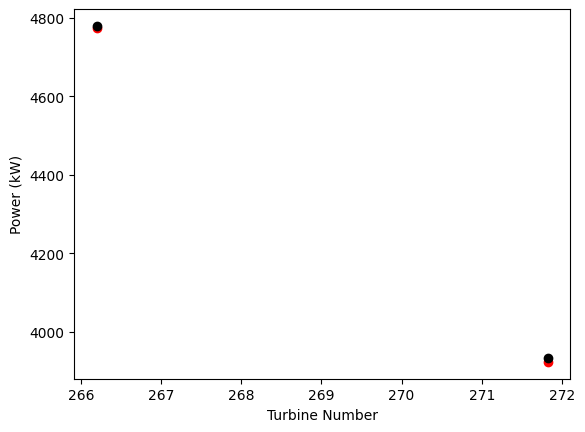

In [11]:
plt.scatter(pywake_dat.wd, pywake_dat.sel(turbine=1).power, c='r')
plt.scatter(pywake_dat.wd, foxes_dat.sel(turbine=1).power / 1e3, c='k')
plt.xlabel('Turbine Number')
plt.ylabel('Power (kW)')